In [5]:
%matplotlib inline
import random
import time
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import tensorflow as tf
from pylab import rcParams
import os
import json

In [6]:
MODEL_PATH = '../data/model_plate/'
SAMPLES_PATHS = ['../data/plate_data_converted/']

In [7]:
EPOCH = 0

In [8]:
if not os.path.exists(MODEL_PATH):
    os.makedirs(MODEL_PATH)

## Import data

In [9]:
def LoadImage(fname):
    return io.imread(fname)[:,:] / 255.

In [10]:
def LoadAnnotation(fname):
    with open(fname) as data_file:    
        data = json.load(data_file)
    
    print(fname)

    if len(data["objects"]) > 0:
        left = data["objects"][0]["points"]["exterior"][0][0]
        top = data["objects"][0]["points"]["exterior"][0][1]
        right = data["objects"][0]["points"]["exterior"][1][0]
        bottom = data["objects"][0]["points"]["exterior"][1][1]
    else:
        left = 0.0
        top = 0.0
        right = 0.0
        bottom = 0.0
        
#     print(type(left))
    
   
           
    return [left, top, right, bottom]

In [11]:
LoadAnnotation(SAMPLES_PATHS[0]+'ann/1.json')

../data/plate_data_converted/ann/1.json


[0.46875, 0.4951171875, 0.8828125, 0.712890625]

In [12]:
def ReadDirFiles(dname):
    paths = []
    for file in os.listdir(os.path.join(dname, "img")):
        bname = os.path.basename(file).split(".")[0]
        
        img_name = os.path.join(dname, "img", file)
        ann_name = os.path.join(dname, "ann", bname + ".json")
        paths.append((img_name, ann_name))
    return paths

In [13]:
def ReadPaths(paths):
    all_paths = []
    for path in paths:
        temp_paths = ReadDirFiles(path)
        all_paths.extend(temp_paths)
    return all_paths

In [14]:
def get_tags(fname):
    with open(fname) as data_file:
        data = json.load(data_file)
    tags = data["tags"]
    return tags

In [15]:
def train_test_split(paths, train_tag="train", test_tag="test"):
    train_paths = []
    test_paths = []
    for path in paths:
        img_path, ann_path = path
        tags = get_tags(ann_path)
        if train_tag in tags:
            train_paths.append(path)
        if test_tag in tags:
            test_paths.append(path)
    return train_paths, test_paths

In [16]:
all_paths = ReadPaths(SAMPLES_PATHS)
tr_paths, te_paths = train_test_split(all_paths)

print(len(tr_paths))
print(len(te_paths))

474
12


In [17]:
print(tr_paths[0])

('../data/plate_data_converted/img/77.jpg', '../data/plate_data_converted/ann/77.json')


In [18]:
def LoadData(paths):
    xs = []
    ys = []
    for ex_paths in paths:
        img_path = ex_paths[0]
        ann_path = ex_paths[1]
        xs.append(LoadImage(img_path))
        ys.append(LoadAnnotation(ann_path))
    
    return np.array(xs), np.array(ys)

In [19]:
X_train, Y_train = LoadData(tr_paths)
X_test, Y_test = LoadData(te_paths)

print("check shapes:")
print("X_train - ", X_train.shape)
print("Y_train - ", Y_train.shape)
print("X_test - ", X_test.shape)
print("Y_test - ", Y_test.shape)

../data/plate_data_converted/ann/77.json
../data/plate_data_converted/ann/116.json
../data/plate_data_converted/ann/112.json
../data/plate_data_converted/ann/316.json
../data/plate_data_converted/ann/324.json
../data/plate_data_converted/ann/56.json
../data/plate_data_converted/ann/43.json
../data/plate_data_converted/ann/207.json
../data/plate_data_converted/ann/426.json
../data/plate_data_converted/ann/89.json
../data/plate_data_converted/ann/119.json
../data/plate_data_converted/ann/138.json
../data/plate_data_converted/ann/463.json
../data/plate_data_converted/ann/471.json
../data/plate_data_converted/ann/244.json
../data/plate_data_converted/ann/416.json
../data/plate_data_converted/ann/290.json
../data/plate_data_converted/ann/104.json
../data/plate_data_converted/ann/412.json
../data/plate_data_converted/ann/161.json
../data/plate_data_converted/ann/15.json
../data/plate_data_converted/ann/135.json
../data/plate_data_converted/ann/443.json
../data/plate_data_converted/ann/32.jso

../data/plate_data_converted/ann/196.json
../data/plate_data_converted/ann/425.json
../data/plate_data_converted/ann/201.json
../data/plate_data_converted/ann/394.json
../data/plate_data_converted/ann/286.json
../data/plate_data_converted/ann/259.json
../data/plate_data_converted/ann/445.json
../data/plate_data_converted/ann/456.json
../data/plate_data_converted/ann/414.json
../data/plate_data_converted/ann/433.json
../data/plate_data_converted/ann/206.json
../data/plate_data_converted/ann/454.json
../data/plate_data_converted/ann/317.json
../data/plate_data_converted/ann/123.json
../data/plate_data_converted/ann/462.json
../data/plate_data_converted/ann/182.json
../data/plate_data_converted/ann/336.json
../data/plate_data_converted/ann/173.json
../data/plate_data_converted/ann/292.json
../data/plate_data_converted/ann/372.json
../data/plate_data_converted/ann/345.json
../data/plate_data_converted/ann/459.json
../data/plate_data_converted/ann/409.json
../data/plate_data_converted/ann/2

../data/plate_data_converted/ann/23.json
../data/plate_data_converted/ann/375.json
../data/plate_data_converted/ann/357.json
../data/plate_data_converted/ann/53.json
../data/plate_data_converted/ann/328.json
../data/plate_data_converted/ann/432.json
../data/plate_data_converted/ann/143.json
../data/plate_data_converted/ann/46.json
../data/plate_data_converted/ann/189.json
../data/plate_data_converted/ann/325.json
../data/plate_data_converted/ann/267.json
../data/plate_data_converted/ann/395.json
../data/plate_data_converted/ann/60.json
../data/plate_data_converted/ann/216.json
../data/plate_data_converted/ann/68.json
../data/plate_data_converted/ann/265.json
../data/plate_data_converted/ann/283.json
../data/plate_data_converted/ann/86.json
../data/plate_data_converted/ann/240.json
../data/plate_data_converted/ann/282.json
../data/plate_data_converted/ann/70.json
../data/plate_data_converted/ann/19.json
../data/plate_data_converted/ann/480.json
../data/plate_data_converted/ann/150.json


In [20]:
img_sz = X_train.shape[1]

### Show sample images

<Figure size 1008x576 with 0 Axes>

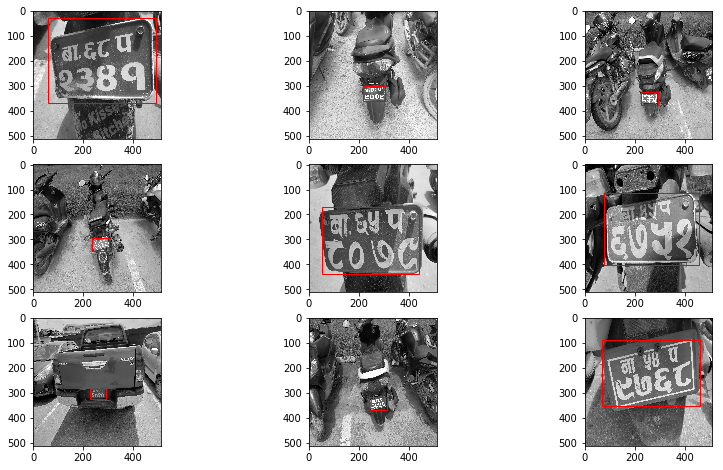

In [21]:
def show_image(image, labels, img_sz):
    rect = Rectangle((labels[0]*img_sz-(labels[2]*img_sz)/2, labels[1]*img_sz-(labels[3]*img_sz)/2), labels[2]*img_sz, labels[3]*img_sz, edgecolor='r', fill=False)
    plt.imshow(image)
    gca = plt.gca()
    gca.add_patch(rect)
    
def plot_images(images, labels, img_sz):
    rcParams['figure.figsize'] = 14, 8
    plt.gray()
    fig = plt.figure()
    for i in range(min(9, images.shape[0])):
#     for i in range(100):
        fig.add_subplot(3, 3, i+1)
        show_image(images[i], labels[i], img_sz)
    plt.show()    
    
xs = [random.randint(0, X_train.shape[0]-1) for _ in range(100)]                   
plot_images(X_train[xs], Y_train[xs], img_sz)  

## Batch iterator

In [22]:
class Dataset:

    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self._epochs_completed = 0
        self._index_in_epoch = 0
        self._num_examples = X.shape[0]

    def next_batch(self, batch_size=20):
        start = self._index_in_epoch
        self._index_in_epoch += batch_size
        if self._index_in_epoch > self._num_examples:
            self._epochs_completed += 1
            # Shuffle the data
            perm = np.arange(self._num_examples)
            np.random.shuffle(perm)
            self.X = self.X[perm]
            self.Y = self.Y[perm]
            # Start next epoch
            start = 0
            self._index_in_epoch = batch_size
            assert batch_size <= self._num_examples
        end = self._index_in_epoch
        return self.X[start:end], self.Y[start:end]

    def epoch_completed(self):
        return self._epochs_completed

## Build Tensorflow neural net

In [23]:
def mse(expected, predicted):
    se = tf.square(expected - predicted)
    return tf.reduce_mean(se)

In [24]:
def weight_variable(name, shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.get_variable(name, initializer=initial)

def bias_variable(name, shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.get_variable(name, initializer=initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')    

In [25]:
PIXEL_COUNT = X_train.shape[1] * X_train.shape[2]
LABEL_COUNT = Y_train.shape[1]
# Create placeholders for image data and expected point positions

class Model(object):
    xxx = 0
    
# Build neural network
def build_model():
    x_placeholder = tf.placeholder(tf.float32, shape=[None, PIXEL_COUNT])
    y_placeholder = tf.placeholder(tf.float32, shape=[None, LABEL_COUNT])

#     x_image = tf.reshape(x_placeholder, [-1, 64, 128, 1])
    x_image = tf.reshape(x_placeholder, [-1, 512, 512, 1])
    # Convolution Layer 1
    W_conv1 = weight_variable("w1", [3, 3, 1, 32])
    b_conv1 = bias_variable("b1", [32])
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)
    # Convolution Layer 2
    W_conv2 = weight_variable("w2", [2, 2, 32, 64])
    b_conv2 = bias_variable("b2", [64])
    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)
    # Convolution Layer 3
    W_conv3 = weight_variable("w3", [2, 2, 64, 128])
    b_conv3 = bias_variable("b3", [128])
    h_conv3 = tf.nn.relu(conv2d(h_pool2, W_conv3) + b_conv3)
    h_pool3 = max_pool_2x2(h_conv3)
    print(h_pool3.shape)
    
#      # Convolution Layer 4
#     W_conv4 = weight_variable("w4", [2, 2, 128, 256])
#     b_conv4 = bias_variable("b4", [256])
#     h_conv4 = tf.nn.relu(conv2d(h_pool3, W_conv4) + b_conv4)
#     h_pool4 = max_pool_2x2(h_conv4)
#     print(h_pool4.shape)
    # Dense layer 1
#     h_pool3_flat = tf.reshape(h_pool3, [-1, 8*16*128])
    h_pool4_flat = tf.reshape(h_pool3, [-1, 64*64*128])
#     W_fc1 = weight_variable("w4", [8*16*128, 500])
    W_fc1 = weight_variable("w5", [64*64*128, 500])
    b_fc1 = bias_variable("b5", [500])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool4_flat, W_fc1) + b_fc1)  
    print(h_fc1.shape)
    # Dense layer 2
    W_fc2 = weight_variable("w6", [500, 500])
    b_fc2 = bias_variable("b6", [500])
    h_fc2 = tf.nn.relu(tf.matmul(h_fc1, W_fc2) + b_fc2)
    print(h_fc2.shape)
    # Output layer
    W_out = weight_variable("w7", [500, LABEL_COUNT])
    b_out = bias_variable("b7", [LABEL_COUNT])
    
    output = tf.matmul(h_fc2, W_out) + b_out
    
    model = Model()
    model.x_placeholder = x_placeholder
    model.y_placeholder = y_placeholder
    model.output = output
    print(output.shape)
    
    return model

### Train

In [26]:
X2_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
# Y2_train = Y_train / (64.0, 32.0, 64.0, 32.0) - 1.0
Y2_train = Y_train

X2_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*X_test.shape[2]))
# Y2_test = Y_test / (64.0, 32.0, 64.0, 32.0) - 1
Y2_test = Y_test

dataset = Dataset(X2_train, Y2_train)

In [27]:
g = tf.Graph()
with g.as_default():
    session = tf.InteractiveSession()
    
    model = build_model()
    loss = mse(model.y_placeholder, model.output)
    
    saver = tf.train.Saver()
    start_time = time.time()
    best_score = 1

    train_step = tf.train.AdamOptimizer().minimize(loss)

    session = tf.InteractiveSession()
    session.run(tf.global_variables_initializer())
    saver.restore(session, os.path.join(MODEL_PATH, "model"))

    last_epoch = -1
    while dataset.epoch_completed() < EPOCH:
        (batch_x, batch_y) = dataset.next_batch(20)
        train_step.run(feed_dict={model.x_placeholder: batch_x, model.y_placeholder: batch_y})
        score_train = loss.eval(feed_dict={model.x_placeholder: batch_x, model.y_placeholder: batch_y})
#         print('train score %f' % score_train)
        if dataset.epoch_completed() > last_epoch:
            last_epoch = dataset.epoch_completed()
            score_test = loss.eval(feed_dict={model.x_placeholder: X2_test, model.y_placeholder: Y2_test})
#             score_test = 0
#             score_train = loss.eval(feed_dict={model.x_placeholder: X2_train, model.y_placeholder: Y2_train})
#             score_train = 0
            if score_test < best_score:
                best_score = score_test
                saver.save(session, os.path.join(MODEL_PATH, "model"))
            if dataset.epoch_completed() % 1 == 0:
                epm = 60 * dataset.epoch_completed() / (time.time()-start_time)
#                 score_train = loss.eval(feed_dict={model.x_placeholder: X2_train, model.y_placeholder: Y2_train})
                print('Epoch: %d, test Score: %f, train score: %f Epoch per minute: %f' % (dataset.epoch_completed(), score_test, score_train, epm))
    print('Finished in %f seconds.' % (time.time()-start_time)) 
    
    session.close()

(?, 64, 64, 128)
(?, 500)
(?, 500)
(?, 4)


/usr/local/lib/python2.7/dist-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


INFO:tensorflow:Restoring parameters from ../data/model_plate/model
Finished in 3.855686 seconds.


### Show test set predictions

(?, 64, 64, 128)
(?, 500)
(?, 500)
(?, 4)
INFO:tensorflow:Restoring parameters from ../data/model_plate/model


<Figure size 1008x576 with 0 Axes>

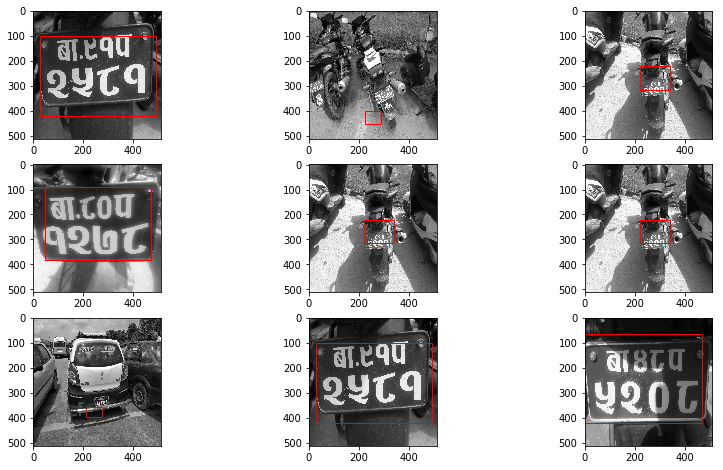

In [28]:
g = tf.Graph()
with g.as_default():
    session = tf.InteractiveSession()
    model = build_model()
    saver = tf.train.Saver()
    saver.restore(session, os.path.join(MODEL_PATH, "model"))
    ids = [random.randint(0, X2_test.shape[0]-1) for _ in range(9)]
    predictions = model.output.eval(session=session, feed_dict={model.x_placeholder: X2_test[ids]})
#     plot_images(X_test[ids], (predictions+1) * (64, 32, 64, 32))
    plot_images(X_test[ids], predictions, img_sz)
    session.close()

### Show train set predictions

(?, 64, 64, 128)
(?, 500)
(?, 500)
(?, 4)
INFO:tensorflow:Restoring parameters from ../data/model_plate/model


<Figure size 1008x576 with 0 Axes>

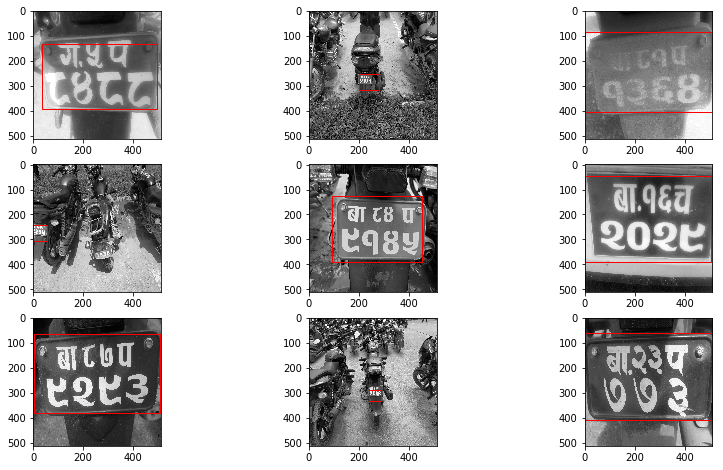

[[0.5192421  0.51010585 0.8931521  0.5105293 ]
 [0.47071946 0.5566228  0.16177435 0.12319456]
 [0.50461525 0.47307092 1.0032275  0.62528056]
 [0.04578511 0.53520024 0.12642029 0.12556355]
 [0.5317218  0.50356936 0.7048235  0.51851237]
 [0.49525297 0.42320344 0.98667765 0.670983  ]
 [0.4989149  0.43360442 0.990986   0.6227674 ]
 [0.5140894  0.6082534  0.0911696  0.08377921]
 [0.503566   0.45742834 1.041487   0.6823682 ]]


In [29]:
g = tf.Graph()
with g.as_default():
    session = tf.InteractiveSession()
    model = build_model()
    saver = tf.train.Saver()
    saver.restore(session, os.path.join(MODEL_PATH, "model"))
    
    ids = [random.randint(0, X_train.shape[0]-1) for _ in range(9)]
    predictions = model.output.eval(session=session, feed_dict={model.x_placeholder: X2_train[ids]})
    plot_images(X_train[ids], predictions, img_sz)
    print(predictions)

    session.close()

In [3]:
from pkgs import crop


In [ ]:
np.frac